# Project Template

A guide for applying machine learning on a dataset.

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [3]:
import pandas as pd
import numpy as np
from numpy import set_printoptions

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection and Evaluation
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

# ML modesl 



# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Learning Curve
from sklearn.model_selection import learning_curve

In [1]:
# load the data
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [4]:
# display all columns
pd.set_option('display.max_columns', None)

In [5]:
# see what we imported (data is a dictionary)
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
# shape of the data
df.shape

(442, 11)

In [9]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [10]:
for col in df.columns:
    shape_info = f"The shape of the column \033[94m{col}\033[0m is \033[92m{df[col].shape}\033[0m and it has \033[91m{df[col].isnull().sum()}\033[0m null values"
    print(shape_info)

The shape of the column age is (442,) and it has 0 null values
The shape of the column sex is (442,) and it has 0 null values
The shape of the column bmi is (442,) and it has 0 null values
The shape of the column bp is (442,) and it has 0 null values
The shape of the column s1 is (442,) and it has 0 null values
The shape of the column s2 is (442,) and it has 0 null values
The shape of the column s3 is (442,) and it has 0 null values
The shape of the column s4 is (442,) and it has 0 null values
The shape of the column s5 is (442,) and it has 0 null values
The shape of the column s6 is (442,) and it has 0 null values
The shape of the column target is (442,) and it has 0 null values


We dont have missing values

In [11]:
# summary statistics for every column
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [13]:
print(df.describe().loc[['min','max']])

          age       sex       bmi        bp        s1        s2        s3  \
min -0.107226 -0.044642 -0.090275 -0.112399 -0.126781 -0.115613 -0.102307   
max  0.110727  0.050680  0.170555  0.132044  0.153914  0.198788  0.181179   

           s4        s5        s6  target  
min -0.076395 -0.126097 -0.137767    25.0  
max  0.185234  0.133597  0.135612   346.0  


**Features**
 - real, -0,2 ~< x ~< 0,2

**Target**
 - integer 25 - 346

We see that the values are already scaled , the BMI shows it clears as the BMI takes values positive and greater than 15 most of the time. So a  minor preprocessing was already taken place, maybe because the rest features are some kind of blood markers.


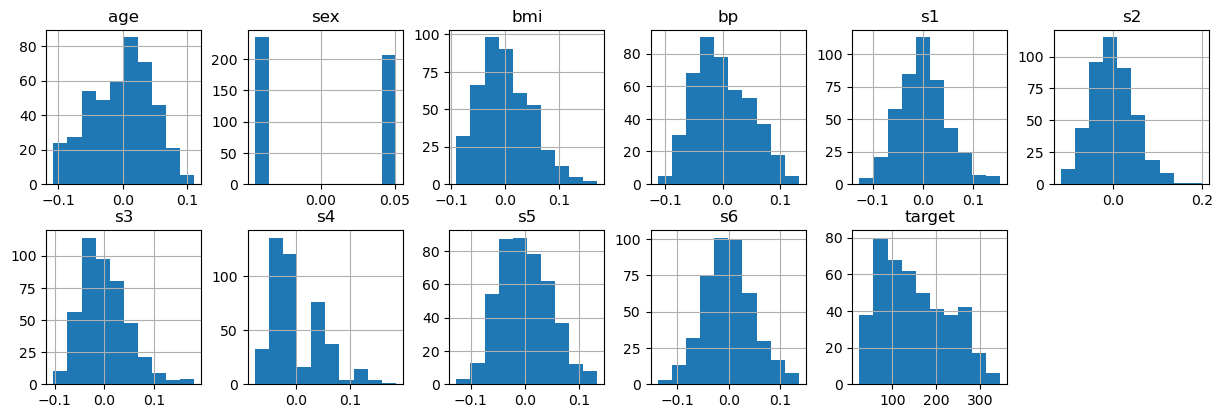

In [16]:
# the distribution of the columns of the dataframe
df.hist(layout=(6, 6), figsize=(15, 15))
plt.show()

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.